In [10]:
### Quantification frequency analysis ###
# wt

# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

require(data.table)
my_data <- as.data.frame(fread("../../changeo_10x/filtered_contig_heavy_germ-pass.tsv"))

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [11]:
# Collapse clonal groups into single sequences
clones <- collapseClones(my_data, cloneColumn="clone_id", 
                         sequenceColumn="sequence_alignment", 
                         germlineColumn="germline_alignment_d_mask", 
                         regionDefinition=IMGT_V, 
                         method="thresholdedFreq", minimumFrequency=0.6,
                         includeAmbiguous=FALSE, breakTiesStochastic=FALSE, 
                         nproc=1)

In [12]:
# Count observed mutations and append mu_count columns to the output
observed <- observedMutations(clones, 
                              sequenceColumn="clonal_sequence",
                              germlineColumn="clonal_germline",
                              regionDefinition=IMGT_V, nproc=1)
# Count expected mutations and append mu_exptected columns to the output
expected <- expectedMutations(observed, 
                              sequenceColumn="clonal_sequence",
                              germlineColumn="clonal_germline",
                              targetingModel=HH_S5F,
                              regionDefinition=IMGT_V, nproc=1)

In [13]:
# Calculate selection scores using the output from expectedMutations
baseline_focused <- calcBaseline(expected, testStatistic="focused", 
                         regionDefinition=IMGT_V, nproc=1)

calcBaseline will use existing observed and expected mutations, in the fields: mu_count_cdr_r, mu_count_cdr_s, mu_count_fwr_r, mu_count_fwr_s and mu_expected_cdr_r, mu_expected_cdr_s, mu_expected_fwr_r, mu_expected_fwr_s



Calculating BASELINe probability density functions...


In [14]:
# Calculate selection scores from scratch
baseline <- calcBaseline(clones, testStatistic="focused", 
                         regionDefinition=IMGT_V, nproc=1)

calcBaseline will calculate observed and expected mutations for clonal_sequence using clonal_germline as a reference.



Calculating BASELINe probability density functions...


In [15]:
grouped_1 <- groupBaseline(baseline, groupBy="c_call")

Grouping BASELINe probability density functions...
Calculating BASELINe statistics...


In [16]:
# Subset the original data to switched isotypes
db_sub <- subset(my_data, c_call %in% c("IGHM", "IGHG"))

# Collapse clonal groups into single sequence
clones_sub <- collapseClones(db_sub, cloneColumn="clone_id",
                             sequenceColumn="sequence_alignment",
                             germlineColumn="germline_alignment_d_mask",
                             regionDefinition=IMGT_V, 
                             method="thresholdedFreq", minimumFrequency=0.6,
                             includeAmbiguous=FALSE, breakTiesStochastic=FALSE, 
                             nproc=1)

# Calculate selection scores from scratch
baseline_sub <- calcBaseline(clones_sub, testStatistic="focused", 
                             regionDefinition=IMGT_V, nproc=1)

# Combine selection scores by time-point and isotype
grouped_2 <- groupBaseline(baseline_sub, groupBy="c_call")

calcBaseline will calculate observed and expected mutations for clonal_sequence using clonal_germline as a reference.



Calculating BASELINe probability density functions...
Grouping BASELINe probability density functions...
Calculating BASELINe statistics...


In [17]:
# First group by subject and status
subject_grouped <- groupBaseline(baseline, groupBy=c("status", "subject"))

# Then group the output by status
status_grouped <- groupBaseline(subject_grouped, groupBy="status")

ERROR: Error in `[.data.frame`(baseline@db, , groupBy): undefined columns selected


In [18]:
testBaseline(grouped_1, groupBy="c_call")

region,test,pvalue,fdr
<chr>,<chr>,<dbl>,<dbl>
cdr,IGHM != IGHD,0.0067723840,0.066369363
cdr,IGHM !=,NA,NA
cdr,IGHM != IGHG2C,0.2790419269,0.441066271
cdr,IGHM != IGHG2B,0.1006035298,0.259451208
cdr,IGHM != IGHA,0.2607772219,0.441066271
cdr,IGHM != IGHG1,0.3686714520,0.480362249
cdr,IGHM != IGHG3,0.2746523492,0.441066271
cdr,IGHD !=,NA,NA
cdr,IGHD != IGHG2C,0.0793410174,0.226822021


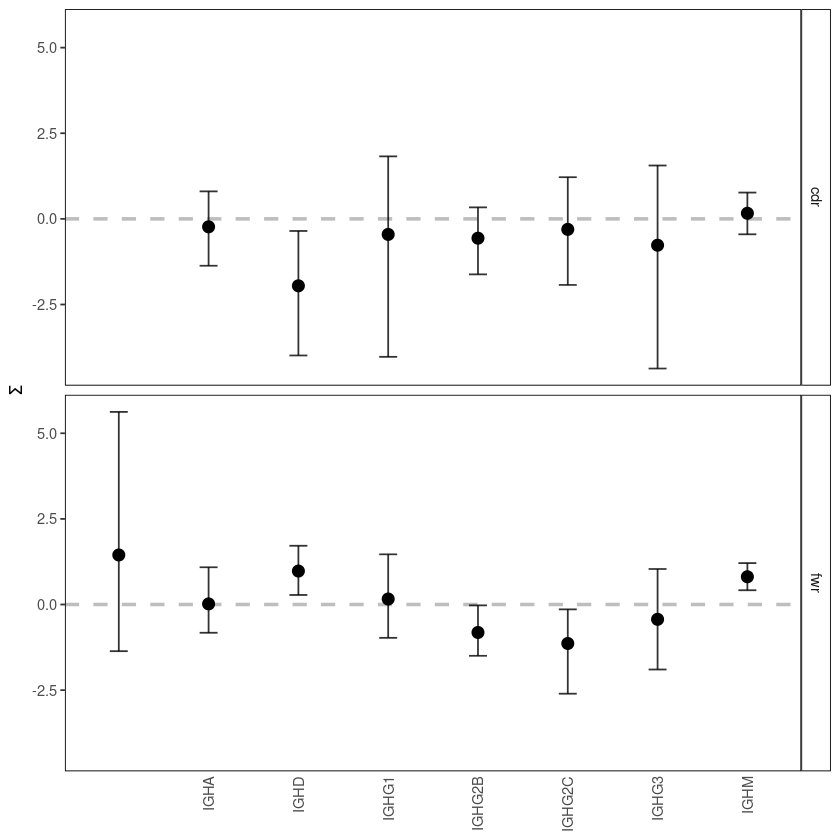

In [19]:
isotype_colors <- c("IGHM"="darkorchid", "IGHD"="firebrick", 
                    "IGHG"="seagreen", "IGHA"="steelblue")

# Plot mean and confidence interval by time-point
plotBaselineSummary(grouped_1, "c_call")

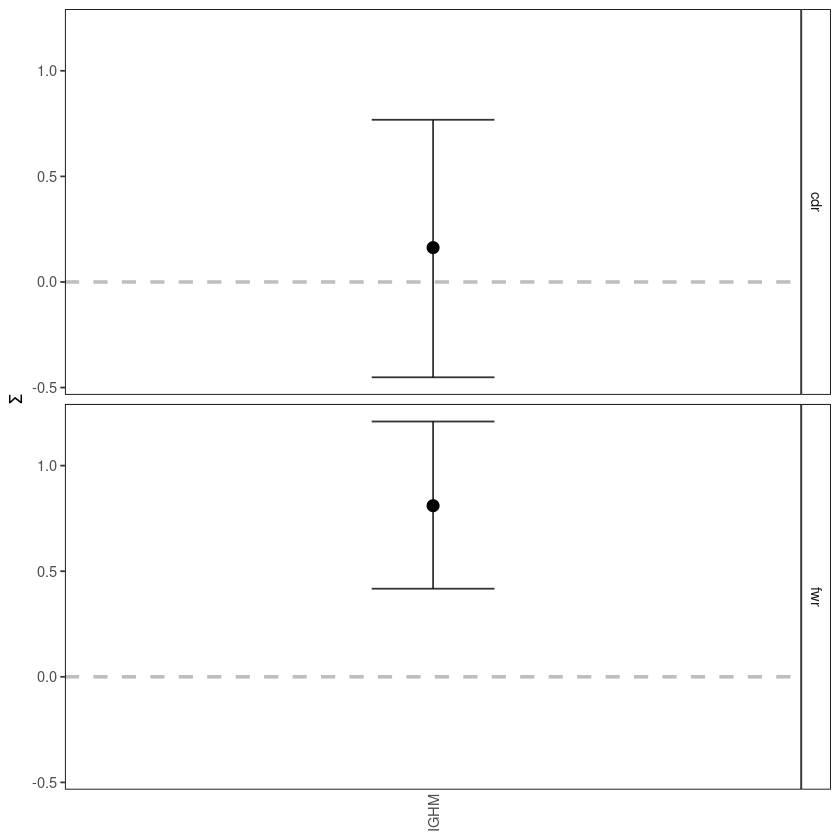

In [20]:
# Group by CDR/FWR and facet by isotype
plotBaselineSummary(grouped_2, "c_call")

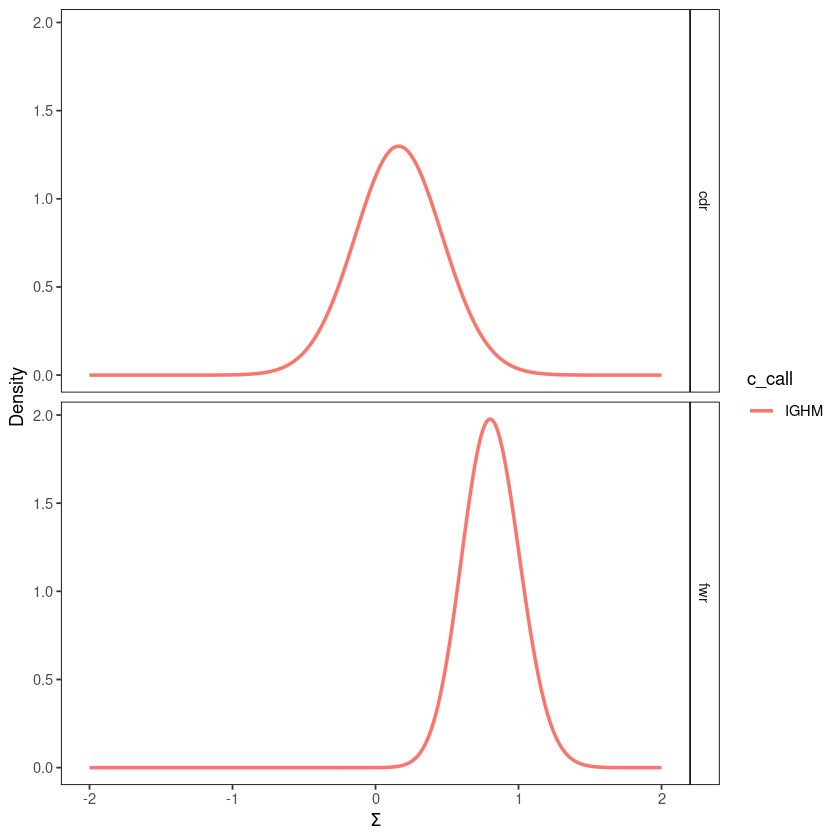

In [21]:
# Plot selection PDFs for a subset of the data
plotBaselineDensity(grouped_2, "c_call", groupColumn="c_call", colorElement="group", 
                    sigmaLimits=c(-2, 2))